In [53]:
# Dependencies
import pandas as pd
import plotly.express as plt
import os
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns

In [62]:
bikecounts_file = os.path.join('../','Resources', 'bikecounts.csv')
bikecounts_df = pd.read_csv(bikecounts_file)
bikecounts_df['Day'] = pd.to_datetime(bikecounts_df['Day'])
bikecounts_df

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
5,5,2016-04-06,2016-04-06,45.0,30.0,0,1885.0,3329,3856.0,2849.0,11919
6,6,2016-04-07,2016-04-07,57.0,53.1,0.09,1276.0,2581,3282.0,2457.0,9596
7,7,2016-04-08,2016-04-08,46.9,44.1,0.01,1982.0,3455,4113.0,3194.0,12744
8,8,2016-04-09,2016-04-09,43.0,37.9,0.09,504.0,997,1507.0,1502.0,4510
9,9,2016-04-10,2016-04-10,48.9,30.9,0,1447.0,2387,3132.0,2160.0,9126


#### General Hypothesis: More people rides the bike at Brooklyn Bridge when  temperatures are high. 
Null Hypothesis: There were no stastical relationship with the number of bikes crossing the Brooklyn Bridge with highest temperature recorded in a day.


This test is being done with an alpha value of 0.05. Therefore, a pvalue less than 0.05 will result in the null hypothesis not being accepted.


In [56]:
bikecounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           30 non-null     int64         
 1   Date                 30 non-null     object        
 2   Day                  30 non-null     datetime64[ns]
 3   High Temp (°F)       30 non-null     float64       
 4   Low Temp (°F)        30 non-null     float64       
 5   Precipitation        30 non-null     object        
 6   Brooklyn Bridge      30 non-null     float64       
 7   Manhattan Bridge     30 non-null     int64         
 8   Williamsburg Bridge  30 non-null     float64       
 9   Queensboro Bridge    30 non-null     float64       
 10  Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 2.7+ KB


In [63]:
# Create a scatter plot of "Income_Per_Capita" versus "Liters_of_Alcohol (Avg. Per year per person)
bikes_brooklyn_v_bikes_temp_high = px.scatter(bikecounts_df, x ="High Temp (°F)" ,y="Brooklyn Bridge",trendline='ols')
bikes_brooklyn_v_bikes_temp_high.show()
    

In [58]:
# Select your independent X terms, and your dependent y term. 
model = sm.OLS(bikecounts_df['Brooklyn Bridge'],bikecounts_df['High Temp (°F)'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Brooklyn Bridge   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              308.6
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    5.35e-17
Time:                        12:05:40   Log-Likelihood:                         -240.13
No. Observations:                  30   AIC:                                      482.3
Df Residuals:                      29   BIC:                                      483.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### The pvalue of 5.35e-17 given by the probability of the F-statistic which is lower than the alpha value.
Thus,Null hypothesis is rejected.


/Users/Nelly/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='High Temp (°F)', ylabel='Brooklyn Bridge'>

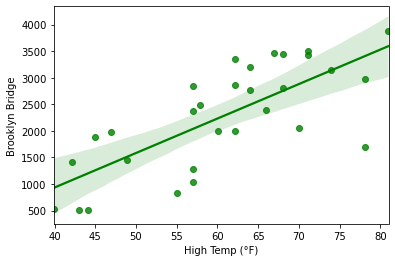

In [65]:
#regression line plot
sns.regplot(bikecounts_df['High Temp (°F)'],bikecounts_df['Brooklyn Bridge'],color="g")